In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import glob

In [10]:
import pydicom as pdi
import tensorflow_io as tfio

In [3]:
dicom_path = r'D:\Gproject\DataSet\test_data\CBIS-DDSM\*\*\*\*'
label_path = r'D:\Gproject\DataSet\test_data'

In [42]:
dicom_mask_path = r'D:\Gproject\DataSet\test_data\CBIS-DDSM\*\*\*\1-2.dcm'


# dicom2img
---

In [5]:
# dicom path를 입력으로 받아서 img반환 (ndarray)
# normalize추가(full 이미지 normalize)
def dcm2img_norm(dcm_path):
    image_bytes = tf.io.read_file(dcm_path)
    
    decode_img_lossy = tfio.image.decode_dicom_image(image_bytes,scale='auto',on_error='lossy', dtype=tf.uint8)
    #############################################################################################
    # args
    # scale : datatype 변형시 fill stretching 
    # on_error : dtype uint 16 -> 8할때 error 방지
    #############################################################################################
    decode_img_lossy_ndr = decode_img_lossy.numpy()
    decode_img_lossy_ndr_norm = decode_img_lossy_ndr[0,...,0]/255
    #decode_img_lossy_ndr_norm_add_axis = decode_img_lossy_ndr_norm[np.newaxis,...,np.newaxis]
    return decode_img_lossy_ndr_norm

# dicom path를 입력으로 받아서 img반환 (ndarray)
#
def dcm2img_norm2(dcm_path):
    try:
        image_bytes = tf.io.read_file(dcm_path)

        decode_img_lossy = tfio.image.decode_dicom_image(image_bytes,scale='auto',on_error='lossy', dtype=tf.uint8)
        #############################################################################################
        # args
        # scale : datatype 변형시 fill stretching 
        # on_error : dtype uint 16 -> 8할때 error 방지
        #############################################################################################
        decode_img_lossy_ndr = decode_img_lossy.numpy()
        decode_img_lossy_ndr_norm = decode_img_lossy_ndr[0,...,0]/255
        #decode_img_lossy_ndr_norm_add_axis = decode_img_lossy_ndr_norm[np.newaxis,...,np.newaxis]
        
    except UnicodeDecodeError:
        print(dcm_path, "not exist")
        return np.zeros((0,0))
    return decode_img_lossy_ndr_norm

In [22]:
# dicom path를 입력으로 받아서 img반환 (ndarray)
# normalzize 미포함(mask 이미지)
def dcm2img_uint8(dcm_path):
    image_bytes = tf.io.read_file(dcm_path)
    
    decode_img_lossy = tfio.image.decode_dicom_image(image_bytes,scale='auto',on_error='lossy', dtype=tf.uint8)
    #############################################################################################
    # args
    # scale : datatype 변형시 fill stretching 
    # on_error : dtype uint 16 -> 8할때 error 방지
    #############################################################################################
    decode_img_lossy_ndr = decode_img_lossy.numpy()
    decode_img_lossy_ndr = decode_img_lossy_ndr[0,...,0]
    #decode_img_lossy_ndr_norm = decode_img_lossy_ndr[0,...,0]/255
    #decode_img_lossy_ndr_norm_add_axis = decode_img_lossy_ndr_norm[np.newaxis,...,np.newaxis]
    return decode_img_lossy_ndr

In [6]:
dsize = (500,760)

# input : dcm full mammography
# output : png file

dicom_full_path = r'D:\Gproject\DataSet\tcia_data\CBIS-DDSM\*Train*\*\*full*\1-1.dcm'
output_path = r'D:\Gproject\DataSet\tcia_data\dataset_dir\train'
count = 0
for dcm in glob.glob(dicom_full_path):
    
    # 파일명 slicing
    dicom_full_path_ID = dcm.split('\\')[5]
    
    # dcm -> img(ndrrray)
    img = dcm2img_norm(dcm)
    
    # TODO : resize 가능한가
    img_resize = cv.resize(img,dsize,interpolation = cv.INTER_AREA)
    
    # 저장파일명
    output_name = output_path + "\\"+ dicom_full_path_ID + "_full"+ ".png"
    plt.imsave(output_name, img_resize,cmap = 'gray')

In [8]:
dsize = (500,760)

# input : dcm full mammography
# output : png file_no norm

dicom_full_path = r'D:\Gproject\DataSet\tcia_data\CBIS-DDSM\*Train*\*\*full*\1-1.dcm'
output_path = r'D:\Gproject\DataSet\tcia_data\dataset_dir\train_no_norm'
count = 0
for dcm in glob.glob(dicom_full_path)[:5]:
    
    # 파일명 slicing
    dicom_full_path_ID = dcm.split('\\')[5]
    
    # dcm -> img(ndrrray)
    img = dcm2img(dcm)
    
    # TODO : resize 가능한가
    img_resize = cv.resize(img,dsize,interpolation = cv.INTER_AREA)
    
    # 저장파일명
    output_name = output_path + "\\"+ dicom_full_path_ID + "_full"+ ".png"
    plt.imsave(output_name, img_resize,cmap = 'gray')

In [5]:
dsize = (500,760)

# input : dcm mask mammography
# output : png file

dicom_mask_path = r'D:\Gproject\DataSet\tcia_data\CBIS-DDSM\*Train*\*\*mask*\1-2.dcm'
output_path = r'D:\Gproject\DataSet\tcia_data\dataset_dir\train'
count = 0
for dcm in glob.glob(dicom_mask_path):
    
    # 파일명 slicing
    dicom_mask_path_ID = dcm.split('\\')[5]
    
    # dcm -> img(ndrrray)
    img = dcm2img(dcm)
    #print("Src path :", dcm)
    # dicom mass train 에서 1-1.dcm과 1-2.dcm사이 매칭이 잘못되있음 --> 해결
    ##################################################
    if img.shape[0] < 2000:
        print("*Changed*")
        str_list = dcm.split('\\')
        str_list.pop()
        str_list.append('1-1.dcm')
        dcm = str_list[0]+"\\" + str_list[1]+"\\" + str_list[2]+"\\" + str_list[3]+"\\"  + str_list[4] +"\\" + str_list[5]+"\\" + str_list[6]+"\\" + str_list[7]+"\\" + str_list[8] 
        #print("Src path :", dcm)
        img = dcm2img(dcm)
        #print(img.shape)
    ##################################################
    
    #full 이미지와 동일한 크기로 resize
    # TODO : resize 가능한가
    img_resize = cv.resize(img,dsize,interpolation = cv.INTER_AREA)
    
    # 저장파일명
    output_name = output_path + "\\"+ dicom_mask_path_ID + "_mask"+ ".png"
    plt.imsave(output_name, img_resize,cmap = 'gray')
    
#     print("Src path :", dcm)
#     print("Dst path :", output_name)
#     print("img shape : ", img.shape)
#     print("img resize : ", img_resize.shape)
#     print("\n\n")
    

*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*


In [24]:
#dsize = (500,760)

# input : roi mask mammography
# output : png file

dicom_mask_path = r'D:\Gproject\DataSet\tcia_data\CBIS-DDSM\*Train*\*\*mask*\1-1.dcm'
output_path = r'D:\Gproject\DataSet\tcia_data\dataset_dir\mask_train'
count = 0
for dcm in glob.glob(dicom_mask_path):
    
    # 파일명 slicing
    dicom_mask_path_ID = dcm.split('\\')[5]
    
    # dcm -> img(ndrrray)
    img = dcm2img_norm(dcm)
    #print("Src path :", dcm)
    # dicom mass train 에서 1-1.dcm과 1-2.dcm사이 매칭이 잘못되있음 --> 해결
    ##################################################
    if img.shape[0] > 2000:
        print("*Changed*")
        
        str_list = dcm.split('\\')
        str_list.pop()
        str_list.append('1-2.dcm')
        dcm = str_list[0]+"\\" + str_list[1]+"\\" + str_list[2]+"\\" + str_list[3]+"\\"  + str_list[4] +"\\" + str_list[5]+"\\" + str_list[6]+"\\" + str_list[7]+"\\" + str_list[8] 
        #print("Src path :", dcm)
        img = dcm2img_norm2(dcm)
        if img.shape == (0,0):
            print(img.shape)
            continue
        #print(img.shape)
    ##################################################
    
    #full 이미지와 동일한 크기로 resize
    # TODO : resize 가능한가
    #img_resize = cv.resize(img,dsize,interpolation = cv.INTER_AREA)
    
    # 저장파일명
    output_name = output_path + "\\"+ dicom_mask_path_ID + "_ROI"+ ".png"
    plt.imsave(output_name, img,cmap = 'gray')
    
#     print("Src path :", dcm)
#     print("Dst path :", output_name)
#     print("img shape : ", img.shape)
#     print("img resize : ", img_resize.shape)
#     print("\n\n")
    

*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Calc-Training_P_00474_LEFT_MLO_1\09-06-2017-DDSM-12715\1.000000-ROI mask images-91565\1-2.dcm not exist
(0, 0)
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
*Changed*
D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Mass-Training_P_00059_LEFT_CC_1\07-21-2016-DDSM-38707\1.000000-ROI mask images-82600\1-2.dcm not exist
(0, 0)
*Changed*
D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Mass-Training_P_00059_LEFT_MLO_1\07-21-2016-DDSM-63603\1.000000-ROI mask images-80695\1-2.dcm not exist
(0, 0)
*Changed

In [26]:
#dsize = (500,760)

# input : roi mask mammography
# output : png file

dicom_mask_path = r'D:\Gproject\DataSet\tcia_data\CBIS-DDSM\*Test*\*\*mask*\1-1.dcm'
output_path = r'D:\Gproject\DataSet\tcia_data\dataset_dir\mask_test'
count = 0
for dcm in glob.glob(dicom_mask_path):
    
    # 파일명 slicing
    dicom_mask_path_ID = dcm.split('\\')[5]
    
    # dcm -> img(ndrrray)
    img = dcm2img_norm(dcm)
    #print("Src path :", dcm)
    # dicom mass train 에서 1-1.dcm과 1-2.dcm사이 매칭이 잘못되있음 --> 해결
    ##################################################
    if img.shape[0] > 2000:
        print("*Changed*")
        
        str_list = dcm.split('\\')
        str_list.pop()
        str_list.append('1-2.dcm')
        dcm = str_list[0]+"\\" + str_list[1]+"\\" + str_list[2]+"\\" + str_list[3]+"\\"  + str_list[4] +"\\" + str_list[5]+"\\" + str_list[6]+"\\" + str_list[7]+"\\" + str_list[8] 
        #print("Src path :", dcm)
        img = dcm2img_norm2(dcm)
        if img.shape == (0,0):
            print(img.shape)
            continue
        #print(img.shape)
    ##################################################
    
    #full 이미지와 동일한 크기로 resize
    # TODO : resize 가능한가
    #img_resize = cv.resize(img,dsize,interpolation = cv.INTER_AREA)
    
    # 저장파일명
    output_name = output_path + "\\"+ dicom_mask_path_ID + "_ROI"+ ".png"
    plt.imsave(output_name, img,cmap = 'gray')
    
#     print("Src path :", dcm)
#     print("Dst path :", output_name)
#     print("img shape : ", img.shape)
#     print("img resize : ", img_resize.shape)
#     print("\n\n")
    

*Changed*
*Changed*
D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Mass-Test_P_00145_LEFT_CC_1\09-27-2017-DDSM-31267\1.000000-ROI mask images-45741\1-2.dcm not exist
(0, 0)
*Changed*
D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Mass-Test_P_00145_LEFT_MLO_1\10-04-2016-DDSM-52166\1.000000-ROI mask images-28215\1-2.dcm not exist
(0, 0)
*Changed*
D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Mass-Test_P_00192_RIGHT_CC_1\10-04-2016-DDSM-43116\1.000000-ROI mask images-84137\1-2.dcm not exist
(0, 0)
*Changed*
D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Mass-Test_P_00381_LEFT_CC_1\10-04-2016-DDSM-78728\1.000000-ROI mask images-35759\1-2.dcm not exist
(0, 0)
*Changed*
D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Mass-Test_P_00381_LEFT_MLO_1\10-04-2016-DDSM-32671\1.000000-ROI mask images-02900\1-2.dcm not exist
(0, 0)
*Changed*
D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Mass-Test_P_00699_RIGHT_CC_1\10-04-2016-DDSM-65992\1.000000-ROI mask images-96523\1-2.dcm not exist
(0, 0)
*Changed*
D:\Gproject\DataSet\tcia_data\CBIS-DDSM\

# mask2Json
---

In [1]:
import cv2 as cv
import numpy as np
import glob
import json
import matplotlib.pyplot as plt

In [14]:
# region + class
skip_count = 0
old_filename =''
MASK_PATH = r'E:\DataSet\CBIS-DDSM\train\*_mask.png'
masks = glob.glob(MASK_PATH)
regions ={}
data = {}
count = 0
for i in range(len(masks)):
    
    regions = {}
    filename = masks[i][:-10] + "full.png"
    #print(filename)
    #next_filename = masks[i+1][:-10] + "full.png"
                #name
    name = masks[i].split("\\")[-1][:4]
                    # all_points_x, y
        
    mask = cv.imread(masks[i],cv.IMREAD_GRAYSCALE)
    #print("read image : ", masks[i])
    
    size = mask.shape[0] * mask.shape[1]
    
    key = filename + str(size)
    
    contours_info = cv.findContours(mask,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
    #print(contours_info)
    
    # 가상환경
    # rcnn_1.14
    #contours_info[0][0][...,0]
    
    # gf2
    #contours_info[1][0][...,0]
    
    x = contours_info[0][0][...,0]
    #all_point_x = x[::skip_count]
    all_point_x = x
    in_x = list(all_point_x[...,0].astype(float))
    
    
    y = contours_info[0][0][...,1]
    #all_point_y = y[::skip_count]
    all_point_y = y
    in_y = list(all_point_y[...,0].astype(float))
    #print(len(in_x),len(in_y))   
    if old_filename == filename:
        count +=1
    else:
        count = 0
    
    old_filename = filename
    
    
    if count ==0:
       
        data[key] = {"size":size,"filename":filename,"regions":regions}  
    data[key]['regions'][str(count)] = {"shape_attributes":{"name":name,"all_point_x":in_x,'all_point_y':in_y}}
    #print(key, size, filename, regions)

In [8]:
size

14476544

In [15]:
import json

with open(r'E:\DataSet\CBIS-DDSM\train\annotation.json','w') as json_file:
    json.dump(data,json_file)

In [16]:
# region
skip_count = 0
old_filename =''
MASK_PATH = r'E:\DataSet\CBIS-DDSM\train\*_mask.png'
OUTPUT_JSON = r'E:\DataSet\CBIS-DDSM\train\anno_region.json'
masks = glob.glob(MASK_PATH)
regions ={}
data = {}
count = 0
for i in range(len(masks)):
    
    regions = {}
    filename = masks[i][:-10] + "full.png"
    #print(filename)
    #next_filename = masks[i+1][:-10] + "full.png"
                #name
    #name = masks[i].split("\\")[-1][:4]
                    # all_points_x, y
        
    mask = cv.imread(masks[i],cv.IMREAD_GRAYSCALE)
    #print("read image : ", masks[i])
    
    size = mask.shape[0] * mask.shape[1]
    
    key = filename + str(size)
    
    contours_info = cv.findContours(mask,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
    #print(contours_info)
    
    # 가상환경
    # gf2
    #contours_info[0][0][...,0]
    
    # rcnn_1.14
    #contours_info[1][0][...,0]
    
    x = contours_info[0][0][...,0]
    #all_point_x = x[::skip_count]
    all_point_x = x
    in_x = list(all_point_x[...,0].astype(float))
    
    
    y = contours_info[0][0][...,1]
    #all_point_y = y[::skip_count]
    all_point_y = y
    in_y = list(all_point_y[...,0].astype(float))
    #print(len(in_x),len(in_y))   
    if old_filename == filename:
        count +=1
    else:
        count = 0
    
    old_filename = filename
    
    
    if count ==0:
        data[key] = {"size":size,"filename":filename,"regions":regions}  
    data[key]['regions'][str(count)] = {"shape_attributes":{"name":"region","all_point_x":in_x,'all_point_y':in_y}}

with open(OUTPUT_JSON,'w') as json_file:
    json.dump(data,json_file)    

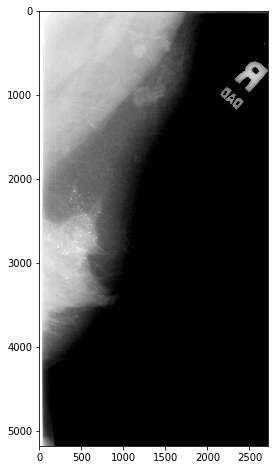

In [22]:
img = plt.imread(r"E:/DataSet/CBIS-DDSM/test/Calc-Test_P_01743_RIGHT_MLO_full.png")

x = [460.0, 459.0, 458.0, 457.0, 456.0, 455.0, 454.0, 453.0, 452.0, 451.0, 450.0, 449.0, 448.0, 
     447.0, 446.0, 445.0, 444.0, 443.0, 442.0, 441.0, 440.0, 439.0, 438.0, 437.0, 436.0, 435.0, 
     434.0, 433.0, 432.0, 431.0, 430.0, 429.0, 428.0, 427.0, 426.0, 425.0, 424.0, 423.0, 422.0, 
     421.0, 420.0, 419.0, 418.0, 417.0, 416.0, 415.0, 414.0, 413.0, 412.0, 411.0, 410.0, 409.0, 
     408.0, 407.0, 406.0, 405.0, 404.0, 403.0, 402.0, 401.0, 400.0, 399.0, 398.0, 397.0, 396.0, 
     395.0, 394.0, 393.0, 392.0, 391.0, 390.0, 389.0, 388.0, 387.0, 386.0, 385.0, 384.0, 383.0, 
     382.0, 381.0, 380.0, 379.0, 378.0, 377.0, 376.0, 375.0, 374.0, 373.0, 372.0, 371.0, 370.0, 
     369.0, 368.0, 367.0, 366.0, 365.0, 364.0, 363.0, 362.0, 361.0, 360.0, 359.0, 358.0, 357.0, 
     356.0, 355.0, 354.0, 353.0, 352.0, 351.0, 350.0, 349.0, 348.0, 347.0, 346.0, 345.0, 344.0, 
     343.0, 342.0, 341.0, 340.0, 340.0, 340.0, 340.0, 340.0, 340.0, 340.0, 340.0, 339.0, 338.0, 
     337.0, 336.0, 335.0, 334.0, 333.0, 332.0, 331.0, 330.0, 329.0, 328.0, 327.0, 326.0, 325.0, 
     324.0, 323.0, 322.0, 321.0, 320.0, 319.0, 318.0, 317.0, 316.0, 315.0, 314.0, 313.0, 312.0, 
     311.0, 310.0, 309.0, 308.0, 307.0, 306.0, 305.0, 304.0, 303.0, 302.0, 301.0, 300.0, 300.0, 
     300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 299.0, 298.0, 297.0, 296.0, 295.0, 294.0, 293.0, 
     292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 291.0, 290.0, 289.0, 288.0, 287.0, 
     286.0, 285.0, 284.0, 284.0, 284.0, 284.0, 284.0, 284.0, 284.0, 284.0, 283.0, 282.0, 281.0, 
     280.0, 279.0, 278.0, 277.0, 276.0, 276.0, 276.0, 276.0, 276.0, 276.0, 276.0, 276.0, 275.0, 274.0, 273.0, 272.0, 271.0, 270.0, 269.0, 268.0, 268.0, 268.0, 268.0, 268.0, 268.0, 268.0, 268.0, 268.0, 267.0, 266.0, 265.0, 264.0, 263.0, 262.0, 261.0, 260.0, 259.0, 258.0, 257.0, 256.0, 255.0, 254.0, 253.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 251.0, 250.0, 249.0, 248.0, 247.0, 246.0, 245.0, 244.0, 244.0, 244.0, 244.0, 244.0, 244.0, 244.0, 244.0, 244.0, 243.0, 242.0, 241.0, 240.0, 239.0, 238.0, 237.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 235.0, 234.0, 233.0, 232.0, 231.0, 230.0, 229.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 227.0, 226.0, 225.0, 224.0, 223.0, 222.0, 221.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 219.0, 218.0, 217.0, 216.0, 215.0, 214.0, 213.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 211.0, 210.0, 209.0, 208.0, 207.0, 206.0, 205.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 203.0, 202.0, 201.0, 200.0, 199.0, 198.0, 197.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 195.0, 194.0, 193.0, 192.0, 191.0, 190.0, 189.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 187.0, 186.0, 185.0, 184.0, 183.0, 182.0, 181.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 179.0, 178.0, 177.0, 176.0, 175.0, 174.0, 173.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 171.0, 170.0, 169.0, 168.0, 167.0, 166.0, 165.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 163.0, 162.0, 161.0, 160.0, 159.0, 158.0, 157.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 155.0, 154.0, 153.0, 152.0, 151.0, 150.0, 149.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 147.0, 146.0, 145.0, 144.0, 143.0, 142.0, 141.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 139.0, 138.0, 137.0, 136.0, 135.0, 134.0, 133.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 131.0, 130.0, 129.0, 128.0, 127.0, 126.0, 125.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 131.0, 130.0, 129.0, 128.0, 127.0, 126.0, 125.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 189.0, 190.0, 191.0, 192.0, 193.0, 194.0, 195.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 197.0, 198.0, 199.0, 200.0, 201.0, 202.0, 203.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 205.0, 206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 213.0, 214.0, 215.0, 216.0, 217.0, 218.0, 219.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232.0, 233.0, 234.0, 235.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 237.0, 238.0, 239.0, 240.0, 241.0, 242.0, 243.0, 244.0, 244.0, 244.0, 244.0, 244.0, 244.0, 244.0, 244.0, 245.0, 246.0, 247.0, 248.0, 249.0, 250.0, 251.0, 252.0, 253.0, 254.0, 255.0, 256.0, 257.0, 258.0, 259.0, 260.0, 260.0, 260.0, 260.0, 260.0, 260.0, 260.0, 260.0, 260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 266.0, 267.0, 268.0, 268.0, 268.0, 268.0, 268.0, 268.0, 268.0, 268.0, 269.0, 270.0, 271.0, 272.0, 273.0, 274.0, 275.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 284.0, 284.0, 284.0, 284.0, 284.0, 284.0, 284.0, 284.0, 285.0, 286.0, 287.0, 288.0, 289.0, 290.0, 291.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298.0, 299.0, 300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306.0, 307.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 309.0, 310.0, 311.0, 312.0, 313.0, 314.0, 315.0, 316.0, 316.0, 316.0, 316.0, 316.0, 316.0, 316.0, 316.0, 317.0, 318.0, 319.0, 320.0, 321.0, 322.0, 323.0, 324.0, 325.0, 326.0, 327.0, 328.0, 329.0, 330.0, 331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337.0, 338.0, 339.0, 340.0, 341.0, 342.0, 343.0, 344.0, 345.0, 346.0, 347.0, 348.0, 348.0, 348.0, 348.0, 348.0, 348.0, 348.0, 348.0, 349.0, 350.0, 351.0, 352.0, 353.0, 354.0, 355.0, 356.0, 357.0, 358.0, 359.0, 360.0, 361.0, 362.0, 363.0, 364.0, 365.0, 366.0, 367.0, 368.0, 369.0, 370.0, 371.0, 372.0, 372.0, 372.0, 372.0, 372.0, 372.0, 372.0, 372.0, 373.0, 374.0, 375.0, 376.0, 377.0, 378.0, 379.0, 380.0, 381.0, 382.0, 383.0, 384.0, 385.0, 386.0, 387.0, 388.0, 389.0, 390.0, 391.0, 392.0, 393.0, 394.0, 395.0, 396.0, 396.0, 396.0, 396.0, 396.0, 396.0, 396.0, 396.0, 397.0, 398.0, 399.0, 400.0, 401.0, 402.0, 403.0, 404.0, 405.0, 406.0, 407.0, 408.0, 409.0, 410.0, 411.0, 412.0, 413.0, 414.0, 415.0, 416.0, 417.0, 418.0, 419.0, 420.0, 421.0, 422.0, 423.0, 424.0, 425.0, 426.0, 427.0, 428.0, 429.0, 430.0, 431.0, 432.0, 433.0, 434.0, 435.0, 436.0, 437.0, 438.0, 439.0, 440.0, 441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 476.0, 476.0, 476.0, 476.0, 476.0, 476.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 492.0, 492.0, 492.0, 492.0, 492.0, 492.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0, 573.0, 574.0, 575.0, 576.0, 577.0, 578.0, 579.0, 580.0, 581.0, 582.0, 583.0, 584.0, 585.0, 586.0, 587.0, 588.0, 589.0, 590.0, 591.0, 592.0, 593.0, 594.0, 595.0, 596.0, 596.0, 596.0, 596.0, 596.0, 596.0, 596.0, 596.0, 597.0, 598.0, 599.0, 600.0, 601.0, 602.0, 603.0, 604.0, 605.0, 606.0, 607.0, 608.0, 609.0, 610.0, 611.0, 612.0, 613.0, 614.0, 615.0, 616.0, 617.0, 618.0, 619.0, 620.0, 621.0, 622.0, 623.0, 624.0, 625.0, 626.0, 627.0, 628.0, 629.0, 630.0, 631.0, 632.0, 633.0, 634.0, 635.0, 636.0, 637.0, 638.0, 639.0, 640.0, 641.0, 642.0, 643.0, 644.0, 645.0, 646.0, 647.0, 648.0, 649.0, 650.0, 651.0, 652.0, 653.0, 654.0, 655.0, 656.0, 657.0, 658.0, 659.0, 660.0, 661.0, 662.0, 663.0, 664.0, 665.0, 666.0, 667.0, 668.0, 669.0, 670.0, 671.0, 672.0, 673.0, 674.0, 675.0, 676.0, 677.0, 678.0, 679.0, 680.0, 681.0, 682.0, 683.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 685.0, 686.0, 687.0, 688.0, 689.0, 690.0, 691.0, 692.0, 693.0, 694.0, 695.0, 696.0, 697.0, 698.0, 699.0, 700.0, 701.0, 702.0, 703.0, 704.0, 705.0, 706.0, 707.0, 708.0, 709.0, 710.0, 711.0, 712.0, 713.0, 714.0, 715.0, 716.0, 717.0, 718.0, 719.0, 720.0, 721.0, 722.0, 723.0, 724.0, 725.0, 726.0, 727.0, 728.0, 729.0, 730.0, 731.0, 732.0, 732.0, 732.0, 732.0, 732.0, 732.0, 732.0, 732.0, 733.0, 734.0, 735.0, 736.0, 737.0, 738.0, 739.0, 740.0, 741.0, 742.0, 743.0, 744.0, 745.0, 746.0, 747.0, 748.0, 749.0, 750.0, 751.0, 752.0, 753.0, 754.0, 755.0, 756.0, 756.0, 756.0, 756.0, 756.0, 756.0, 756.0, 756.0, 757.0, 758.0, 759.0, 760.0, 761.0, 762.0, 763.0, 764.0, 765.0, 766.0, 767.0, 768.0, 769.0, 770.0, 771.0, 772.0, 773.0, 774.0, 775.0, 776.0, 777.0, 778.0, 779.0, 780.0, 781.0, 782.0, 783.0, 784.0, 785.0, 786.0, 787.0, 788.0, 788.0, 788.0, 788.0, 788.0, 788.0, 788.0, 788.0, 789.0, 790.0, 791.0, 792.0, 793.0, 794.0, 795.0, 796.0, 797.0, 798.0, 799.0, 800.0, 801.0, 802.0, 803.0, 804.0, 805.0, 806.0, 807.0, 808.0, 809.0, 810.0, 811.0, 812.0, 813.0, 814.0, 815.0, 816.0, 817.0, 818.0, 819.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 821.0, 822.0, 823.0, 824.0, 825.0, 826.0, 827.0, 828.0, 829.0, 830.0, 831.0, 832.0, 833.0, 834.0, 835.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 837.0, 838.0, 839.0, 840.0, 841.0, 842.0, 843.0, 844.0, 845.0, 846.0, 847.0, 848.0, 849.0, 850.0, 851.0, 852.0, 853.0, 854.0, 855.0, 856.0, 857.0, 858.0, 859.0, 860.0, 861.0, 862.0, 863.0, 864.0, 865.0, 866.0, 867.0, 868.0, 869.0, 870.0, 871.0, 872.0, 873.0, 874.0, 875.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 877.0, 878.0, 879.0, 880.0, 881.0, 882.0, 883.0, 884.0, 885.0, 886.0, 887.0, 888.0, 889.0, 890.0, 891.0, 892.0, 893.0, 894.0, 895.0, 896.0, 897.0, 898.0, 899.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 901.0, 902.0, 903.0, 904.0, 905.0, 906.0, 907.0, 908.0, 908.0, 908.0, 908.0, 908.0, 908.0, 908.0, 908.0, 909.0, 910.0, 911.0, 912.0, 913.0, 914.0, 915.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 917.0, 918.0, 919.0, 920.0, 921.0, 922.0, 923.0, 924.0, 924.0, 924.0, 924.0, 924.0, 924.0, 924.0, 924.0, 925.0, 926.0, 927.0, 928.0, 929.0, 930.0, 931.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 933.0, 934.0, 935.0, 936.0, 937.0, 938.0, 939.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 941.0, 942.0, 943.0, 944.0, 945.0, 946.0, 947.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 949.0, 950.0, 951.0, 952.0, 953.0, 954.0, 955.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 957.0, 958.0, 959.0, 960.0, 961.0, 962.0, 963.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 965.0, 966.0, 967.0, 968.0, 969.0, 970.0, 971.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 973.0, 974.0, 975.0, 976.0, 977.0, 978.0, 979.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 981.0, 982.0, 983.0, 984.0, 985.0, 986.0, 987.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 988.0, 987.0, 986.0, 985.0, 984.0, 983.0, 982.0, 981.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 979.0, 978.0, 977.0, 976.0, 975.0, 974.0, 973.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 971.0, 970.0, 969.0, 968.0, 967.0, 966.0, 965.0, 964.0, 963.0, 962.0, 961.0, 960.0, 959.0, 958.0, 957.0, 956.0, 955.0, 954.0, 953.0, 952.0, 951.0, 950.0, 949.0, 948.0, 947.0, 946.0, 945.0, 944.0, 943.0, 942.0, 941.0, 940.0, 939.0, 938.0, 937.0, 936.0, 935.0, 934.0, 933.0, 932.0, 931.0, 930.0, 929.0, 928.0, 927.0, 926.0, 925.0, 924.0, 924.0, 924.0, 924.0, 924.0, 924.0, 924.0, 924.0, 923.0, 922.0, 921.0, 920.0, 919.0, 918.0, 917.0, 916.0, 915.0, 914.0, 913.0, 912.0, 911.0, 910.0, 909.0, 908.0, 908.0, 908.0, 908.0, 908.0, 908.0, 908.0, 908.0, 907.0, 906.0, 905.0, 904.0, 903.0, 902.0, 901.0, 900.0, 899.0, 898.0, 897.0, 896.0, 895.0, 894.0, 893.0, 892.0, 892.0, 892.0, 892.0, 892.0, 892.0, 892.0, 892.0, 891.0, 890.0, 889.0, 888.0, 887.0, 886.0, 885.0, 884.0, 884.0, 884.0, 884.0, 884.0, 884.0, 884.0, 884.0, 883.0, 882.0, 881.0, 880.0, 879.0, 878.0, 877.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 876.0, 875.0, 874.0, 873.0, 872.0, 871.0, 870.0, 869.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 867.0, 866.0, 865.0, 864.0, 863.0, 862.0, 861.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 861.0, 862.0, 863.0, 864.0, 865.0, 866.0, 867.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 867.0, 866.0, 865.0, 864.0, 863.0, 862.0, 861.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 859.0, 858.0, 857.0, 856.0, 855.0, 854.0, 853.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 851.0, 850.0, 849.0, 848.0, 847.0, 846.0, 845.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 843.0, 842.0, 841.0, 840.0, 839.0, 838.0, 837.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 836.0, 837.0, 838.0, 839.0, 840.0, 841.0, 842.0, 843.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 844.0, 845.0, 846.0, 847.0, 848.0, 849.0, 850.0, 851.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 853.0, 854.0, 855.0, 856.0, 857.0, 858.0, 859.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 861.0, 862.0, 863.0, 864.0, 865.0, 866.0, 867.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 868.0, 869.0, 870.0, 871.0, 872.0, 873.0, 874.0, 875.0, 876.0, 877.0, 878.0, 879.0, 880.0, 881.0, 882.0, 883.0, 884.0, 884.0, 884.0, 884.0, 884.0, 884.0, 884.0, 884.0, 885.0, 886.0, 887.0, 888.0, 889.0, 890.0, 891.0, 892.0, 892.0, 892.0, 892.0, 892.0, 892.0, 892.0, 892.0, 893.0, 894.0, 895.0, 896.0, 897.0, 898.0, 899.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 901.0, 902.0, 903.0, 904.0, 905.0, 906.0, 907.0, 908.0, 908.0, 908.0, 908.0, 908.0, 908.0, 908.0, 908.0, 909.0, 910.0, 911.0, 912.0, 913.0, 914.0, 915.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 917.0, 918.0, 919.0, 920.0, 921.0, 922.0, 923.0, 924.0, 924.0, 924.0, 924.0, 924.0, 924.0, 924.0, 924.0, 925.0, 926.0, 927.0, 928.0, 929.0, 930.0, 931.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 933.0, 934.0, 935.0, 936.0, 937.0, 938.0, 939.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 941.0, 942.0, 943.0, 944.0, 945.0, 946.0, 947.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 948.0, 949.0, 950.0, 951.0, 952.0, 953.0, 954.0, 955.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 957.0, 958.0, 959.0, 960.0, 961.0, 962.0, 963.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 965.0, 966.0, 967.0, 968.0, 969.0, 970.0, 971.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 973.0, 974.0, 975.0, 976.0, 977.0, 978.0, 979.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 979.0, 978.0, 977.0, 976.0, 975.0, 974.0, 973.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 972.0, 971.0, 970.0, 969.0, 968.0, 967.0, 966.0, 965.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 964.0, 963.0, 962.0, 961.0, 960.0, 959.0, 958.0, 957.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 956.0, 955.0, 954.0, 953.0, 952.0, 951.0, 950.0, 949.0, 948.0, 947.0, 946.0, 945.0, 944.0, 943.0, 942.0, 941.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 940.0, 939.0, 938.0, 937.0, 936.0, 935.0, 934.0, 933.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 932.0, 931.0, 930.0, 929.0, 928.0, 927.0, 926.0, 925.0, 924.0, 923.0, 922.0, 921.0, 920.0, 919.0, 918.0, 917.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 915.0, 914.0, 913.0, 912.0, 911.0, 910.0, 909.0, 908.0, 907.0, 906.0, 905.0, 904.0, 903.0, 902.0, 901.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 899.0, 898.0, 897.0, 896.0, 895.0, 894.0, 893.0, 892.0, 892.0, 892.0, 892.0, 892.0, 892.0, 892.0, 892.0, 891.0, 890.0, 889.0, 888.0, 887.0, 886.0, 885.0, 884.0, 883.0, 882.0, 881.0, 880.0, 879.0, 878.0, 877.0, 876.0, 875.0, 874.0, 873.0, 872.0, 871.0, 870.0, 869.0, 868.0, 867.0, 866.0, 865.0, 864.0, 863.0, 862.0, 861.0, 860.0, 859.0, 858.0, 857.0, 856.0, 855.0, 854.0, 853.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 852.0, 851.0, 850.0, 849.0, 848.0, 847.0, 846.0, 845.0, 844.0, 843.0, 842.0, 841.0, 840.0, 839.0, 838.0, 837.0, 836.0, 835.0, 834.0, 833.0, 832.0, 831.0, 830.0, 829.0, 828.0, 828.0, 828.0, 828.0, 828.0, 828.0, 828.0, 828.0, 827.0, 826.0, 825.0, 824.0, 823.0, 822.0, 821.0, 820.0, 819.0, 818.0, 817.0, 816.0, 815.0, 814.0, 813.0, 812.0, 811.0, 810.0, 809.0, 808.0, 807.0, 806.0, 805.0, 804.0, 803.0, 802.0, 801.0, 800.0, 799.0, 798.0, 797.0, 796.0, 796.0, 796.0, 796.0, 796.0, 796.0, 796.0, 796.0, 795.0, 794.0, 793.0, 792.0, 791.0, 790.0, 789.0, 788.0, 787.0, 786.0, 785.0, 784.0, 783.0, 782.0, 781.0, 780.0, 779.0, 778.0, 777.0, 776.0, 775.0, 774.0, 773.0, 772.0, 771.0, 770.0, 769.0, 768.0, 767.0, 766.0, 765.0, 764.0, 763.0, 762.0, 761.0, 760.0, 759.0, 758.0, 757.0, 756.0, 755.0, 754.0, 753.0, 752.0, 751.0, 750.0, 749.0, 748.0, 747.0, 746.0, 745.0, 744.0, 743.0, 742.0, 741.0, 740.0, 739.0, 738.0, 737.0, 736.0, 735.0, 734.0, 733.0, 732.0, 731.0, 730.0, 729.0, 728.0, 727.0, 726.0, 725.0, 724.0, 723.0, 722.0, 721.0, 720.0, 719.0, 718.0, 717.0, 716.0, 715.0, 714.0, 713.0, 712.0, 711.0, 710.0, 709.0, 708.0, 708.0, 708.0, 708.0, 708.0, 708.0, 708.0, 708.0, 707.0, 706.0, 705.0, 704.0, 703.0, 702.0, 701.0, 700.0, 699.0, 698.0, 697.0, 696.0, 695.0, 694.0, 693.0, 692.0, 691.0, 690.0, 689.0, 688.0, 687.0, 686.0, 685.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 683.0, 682.0, 681.0, 680.0, 679.0, 678.0, 677.0, 676.0, 675.0, 674.0, 673.0, 672.0, 671.0, 670.0, 669.0, 668.0, 667.0, 666.0, 665.0, 664.0, 663.0, 662.0, 661.0, 660.0, 659.0, 658.0, 657.0, 656.0, 655.0, 654.0, 653.0, 652.0, 651.0, 650.0, 649.0, 648.0, 647.0, 646.0, 645.0, 644.0, 643.0, 642.0, 641.0, 640.0, 639.0, 638.0, 637.0, 636.0, 635.0, 634.0, 633.0, 632.0, 631.0, 630.0, 629.0, 628.0, 627.0, 626.0, 625.0, 624.0, 623.0, 622.0, 621.0, 620.0, 619.0, 618.0, 617.0, 616.0, 615.0, 614.0, 613.0, 612.0, 611.0, 610.0, 609.0, 608.0, 607.0, 606.0, 605.0, 604.0, 603.0, 602.0, 601.0, 600.0, 599.0, 598.0, 597.0, 596.0, 595.0, 594.0, 593.0, 592.0, 591.0, 590.0, 589.0, 588.0, 587.0, 586.0, 585.0, 584.0, 583.0, 582.0, 581.0, 580.0, 579.0, 578.0, 577.0, 576.0, 575.0, 574.0, 573.0, 572.0, 571.0, 570.0, 569.0, 568.0, 567.0, 566.0, 565.0, 564.0, 563.0, 562.0, 561.0, 560.0, 559.0, 558.0, 557.0, 556.0, 555.0, 554.0, 553.0, 552.0, 551.0, 550.0, 549.0, 548.0, 547.0, 546.0, 545.0, 544.0, 543.0, 542.0, 541.0, 540.0, 539.0, 538.0, 537.0, 536.0, 535.0, 534.0, 533.0, 532.0, 531.0, 530.0, 529.0, 528.0, 527.0, 526.0, 525.0, 524.0, 523.0, 522.0, 521.0, 520.0, 519.0, 518.0, 517.0, 516.0, 515.0, 514.0, 513.0, 512.0, 511.0, 510.0, 509.0, 508.0, 507.0, 506.0, 505.0, 504.0, 503.0, 502.0, 501.0, 500.0, 499.0, 498.0, 497.0, 496.0, 495.0, 494.0, 493.0, 492.0, 491.0, 490.0, 489.0, 488.0, 487.0, 486.0, 485.0, 484.0, 483.0, 482.0, 481.0, 480.0, 479.0, 478.0, 477.0, 476.0, 475.0, 474.0, 473.0, 472.0, 471.0, 470.0, 469.0, 468.0, 467.0, 466.0, 465.0, 464.0, 463.0, 462.0, 461.0]
y = [ 1876.0, 1877.0, 1878.0, 1879.0, 1880.0, 1881.0, 1882.0, 1883.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1885.0, 1886.0, 1887.0, 1888.0, 1889.0, 1890.0, 1891.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1893.0, 1894.0, 1895.0, 1896.0, 1897.0, 1898.0, 1899.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1901.0, 1902.0, 1903.0, 1904.0, 1905.0, 1906.0, 1907.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1909.0, 1910.0, 1911.0, 1912.0, 1913.0, 1914.0, 1915.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1917.0, 1918.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1956.0, 1956.0, 1956.0, 1956.0, 1956.0, 1956.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2012.0, 2012.0, 2012.0, 2012.0, 2012.0, 2012.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2025.0, 2026.0, 2027.0, 2028.0, 2029.0, 2030.0, 2031.0, 2032.0, 2033.0, 2034.0, 2035.0, 2036.0, 2037.0, 2038.0, 2039.0, 2040.0, 2041.0, 2042.0, 2043.0, 2044.0, 2045.0, 2046.0, 2047.0, 2048.0, 2049.0, 2050.0, 2051.0, 2052.0, 2053.0, 2054.0, 2055.0, 2056.0, 2057.0, 2058.0, 2059.0, 2060.0, 2061.0, 2062.0, 2063.0, 2064.0, 2065.0, 2066.0, 2067.0, 2068.0, 2069.0, 2070.0, 2071.0, 2072.0, 2073.0, 2074.0, 2075.0, 2076.0, 2077.0, 2078.0, 2079.0, 2080.0, 2081.0, 2082.0, 2083.0, 2084.0, 2084.0, 2084.0, 2084.0, 2084.0, 2084.0, 2084.0, 2084.0, 2085.0, 2086.0, 2087.0, 2088.0, 2089.0, 2090.0, 2091.0, 2092.0, 2093.0, 2094.0, 2095.0, 2096.0, 2097.0, 2098.0, 2099.0, 2100.0, 2100.0, 2100.0, 2100.0, 2100.0, 2100.0, 2100.0, 2100.0, 2101.0, 2102.0, 2103.0, 2104.0, 2105.0, 2106.0, 2107.0, 2108.0, 2109.0, 2110.0, 2111.0, 2112.0, 2113.0, 2114.0, 2115.0, 2116.0, 2117.0, 2118.0, 2119.0, 2120.0, 2121.0, 2122.0, 2123.0, 2124.0, 2125.0, 2126.0, 2127.0, 2128.0, 2129.0, 2130.0, 2131.0, 2132.0, 2133.0, 2134.0, 2135.0, 2136.0, 2137.0, 2138.0, 2139.0, 2140.0, 2141.0, 2142.0, 2143.0, 2144.0, 2145.0, 2146.0, 2147.0, 2148.0, 2149.0, 2150.0, 2151.0, 2152.0, 2153.0, 2154.0, 2155.0, 2156.0, 2157.0, 2158.0, 2159.0, 2160.0, 2161.0, 2162.0, 2163.0, 2164.0, 2165.0, 2166.0, 2167.0, 2168.0, 2169.0, 2170.0, 2171.0, 2172.0, 2173.0, 2174.0, 2175.0, 2176.0, 2177.0, 2178.0, 2179.0, 2180.0, 2180.0, 2180.0, 2180.0, 2180.0, 2180.0, 2180.0, 2180.0, 2181.0, 2182.0, 2183.0, 2184.0, 2185.0, 2186.0, 2187.0, 2188.0, 2189.0, 2190.0, 2191.0, 2192.0, 2193.0, 2194.0, 2195.0, 2196.0, 2197.0, 2198.0, 2199.0, 2200.0, 2201.0, 2202.0, 2203.0, 2204.0, 2205.0, 2206.0, 2207.0, 2208.0, 2209.0, 2210.0, 2211.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2213.0, 2214.0, 2215.0, 2216.0, 2217.0, 2218.0, 2219.0, 2220.0, 2221.0, 2222.0, 2223.0, 2224.0, 2225.0, 2226.0, 2227.0, 2228.0, 2229.0, 2230.0, 2231.0, 2232.0, 2233.0, 2234.0, 2235.0, 2236.0, 2237.0, 2238.0, 2239.0, 2240.0, 2241.0, 2242.0, 2243.0, 2244.0, 2245.0, 2246.0, 2247.0, 2248.0, 2249.0, 2250.0, 2251.0, 2252.0, 2253.0, 2254.0, 2255.0, 2256.0, 2257.0, 2258.0, 2259.0, 2260.0, 2260.0, 2260.0, 2260.0, 2260.0, 2260.0, 2260.0, 2260.0, 2261.0, 2262.0, 2263.0, 2264.0, 2265.0, 2266.0, 2267.0, 2268.0, 2269.0, 2270.0, 2271.0, 2272.0, 2273.0, 2274.0, 2275.0, 2276.0, 2277.0, 2278.0, 2279.0, 2280.0, 2281.0, 2282.0, 2283.0, 2284.0, 2285.0, 2286.0, 2287.0, 2288.0, 2289.0, 2290.0, 2291.0, 2292.0, 2293.0, 2294.0, 2295.0, 2296.0, 2297.0, 2298.0, 2299.0, 2300.0, 2301.0, 2302.0, 2303.0, 2304.0, 2305.0, 2306.0, 2307.0, 2308.0, 2309.0, 2310.0, 2311.0, 2312.0, 2313.0, 2314.0, 2315.0, 2316.0, 2316.0, 2316.0, 2316.0, 2316.0, 2316.0, 2316.0, 2316.0, 2317.0, 2318.0, 2319.0, 2320.0, 2321.0, 2322.0, 2323.0, 2324.0, 2325.0, 2326.0, 2327.0, 2328.0, 2329.0, 2330.0, 2331.0, 2332.0, 2333.0, 2334.0, 2335.0, 2336.0, 2337.0, 2338.0, 2339.0, 2340.0, 2341.0, 2342.0, 2343.0, 2344.0, 2345.0, 2346.0, 2347.0, 2348.0, 2349.0, 2350.0, 2351.0, 2352.0, 2353.0, 2354.0, 2355.0, 2356.0, 2356.0, 2356.0, 2356.0, 2356.0, 2356.0, 2356.0, 2356.0, 2357.0, 2358.0, 2359.0, 2360.0, 2361.0, 2362.0, 2363.0, 2364.0, 2365.0, 2366.0, 2367.0, 2368.0, 2369.0, 2370.0, 2371.0, 2372.0, 2373.0, 2374.0, 2375.0, 2376.0, 2377.0, 2378.0, 2379.0, 2380.0, 2381.0, 2382.0, 2383.0, 2384.0, 2385.0, 2386.0, 2387.0, 2388.0, 2389.0, 2390.0, 2391.0, 2392.0, 2393.0, 2394.0, 2395.0, 2396.0, 2397.0, 2398.0, 2399.0, 2400.0, 2401.0, 2402.0, 2403.0, 2404.0, 2405.0, 2406.0, 2407.0, 2408.0, 2409.0, 2410.0, 2411.0, 2412.0, 2413.0, 2414.0, 2415.0, 2416.0, 2417.0, 2418.0, 2419.0, 2420.0, 2421.0, 2422.0, 2423.0, 2424.0, 2425.0, 2426.0, 2427.0, 2428.0, 2429.0, 2430.0, 2431.0, 2432.0, 2433.0, 2434.0, 2435.0, 2436.0, 2437.0, 2438.0, 2439.0, 2440.0, 2441.0, 2442.0, 2443.0, 2444.0, 2444.0, 2444.0, 2444.0, 2444.0, 2444.0, 2444.0, 2444.0, 2445.0, 2446.0, 2447.0, 2448.0, 2449.0, 2450.0, 2451.0, 2452.0, 2453.0, 2454.0, 2455.0, 2456.0, 2457.0, 2458.0, 2459.0, 2460.0, 2461.0, 2462.0, 2463.0, 2464.0, 2465.0, 2466.0, 2467.0, 2468.0, 2469.0, 2470.0, 2471.0, 2472.0, 2473.0, 2474.0, 2475.0, 2476.0, 2477.0, 2478.0, 2479.0, 2480.0, 2481.0, 2482.0, 2483.0, 2484.0, 2485.0, 2486.0, 2487.0, 2488.0, 2489.0, 2490.0, 2491.0, 2492.0, 2493.0, 2494.0, 2495.0, 2496.0, 2497.0, 2498.0, 2499.0, 2500.0, 2501.0, 2502.0, 2503.0, 2504.0, 2505.0, 2506.0, 2507.0, 2508.0, 2509.0, 2510.0, 2511.0, 2512.0, 2513.0, 2514.0, 2515.0, 2516.0, 2517.0, 2518.0, 2519.0, 2520.0, 2521.0, 2522.0, 2523.0, 2524.0, 2525.0, 2526.0, 2527.0, 2528.0, 2529.0, 2530.0, 2531.0, 2532.0, 2533.0, 2534.0, 2535.0, 2536.0, 2537.0, 2538.0, 2539.0, 2540.0, 2541.0, 2542.0, 2543.0, 2544.0, 2545.0, 2546.0, 2547.0, 2548.0, 2549.0, 2550.0, 2551.0, 2552.0, 2553.0, 2554.0, 2555.0, 2556.0, 2557.0, 2558.0, 2559.0, 2560.0, 2561.0, 2562.0, 2563.0, 2564.0, 2565.0, 2566.0, 2567.0, 2568.0, 2569.0, 2570.0, 2571.0, 2572.0, 2573.0, 2574.0, 2575.0, 2576.0, 2577.0, 2578.0, 2579.0, 2580.0, 2581.0, 2582.0, 2583.0, 2584.0, 2585.0, 2586.0, 2587.0, 2588.0, 2589.0, 2590.0, 2591.0, 2592.0, 2593.0, 2594.0, 2595.0, 2596.0, 2597.0, 2598.0, 2599.0, 2600.0, 2601.0, 2602.0, 2603.0, 2604.0, 2605.0, 2606.0, 2607.0, 2608.0, 2609.0, 2610.0, 2611.0, 2612.0, 2613.0, 2614.0, 2615.0, 2616.0, 2617.0, 2618.0, 2619.0, 2620.0, 2621.0, 2622.0, 2623.0, 2624.0, 2625.0, 2626.0, 2627.0, 2628.0, 2629.0, 2630.0, 2631.0, 2632.0, 2633.0, 2634.0, 2635.0, 2636.0, 2637.0, 2638.0, 2639.0, 2640.0, 2641.0, 2642.0, 2643.0, 2644.0, 2645.0, 2646.0, 2647.0, 2648.0, 2649.0, 2650.0, 2651.0, 2652.0, 2653.0, 2654.0, 2655.0, 2656.0, 2657.0, 2658.0, 2659.0, 2660.0, 2661.0, 2662.0, 2663.0, 2664.0, 2665.0, 2666.0, 2667.0, 2668.0, 2669.0, 2670.0, 2671.0, 2672.0, 2673.0, 2674.0, 2675.0, 2676.0, 2677.0, 2678.0, 2679.0, 2680.0, 2681.0, 2682.0, 2683.0, 2684.0, 2685.0, 2686.0, 2687.0, 2688.0, 2689.0, 2690.0, 2691.0, 2692.0, 2693.0, 2694.0, 2695.0, 2696.0, 2697.0, 2698.0, 2699.0, 2700.0, 2700.0, 2700.0, 2700.0, 2700.0, 2700.0, 2700.0, 2700.0, 2701.0, 2702.0, 2703.0, 2704.0, 2705.0, 2706.0, 2707.0, 2708.0, 2709.0, 2710.0, 2711.0, 2712.0, 2713.0, 2714.0, 2715.0, 2716.0, 2717.0, 2718.0, 2719.0, 2720.0, 2721.0, 2722.0, 2723.0, 2724.0, 2725.0, 2726.0, 2727.0, 2728.0, 2729.0, 2730.0, 2731.0, 2732.0, 2733.0, 2734.0, 2735.0, 2736.0, 2737.0, 2738.0, 2739.0, 2740.0, 2741.0, 2742.0, 2743.0, 2744.0, 2745.0, 2746.0, 2747.0, 2748.0, 2749.0, 2750.0, 2751.0, 2752.0, 2753.0, 2754.0, 2755.0, 2756.0, 2757.0, 2758.0, 2759.0, 2760.0, 2761.0, 2762.0, 2763.0, 2764.0, 2765.0, 2766.0, 2767.0, 2768.0, 2769.0, 2770.0, 2771.0, 2772.0, 2773.0, 2774.0, 2775.0, 2776.0, 2777.0, 2778.0, 2779.0, 2780.0, 2780.0, 2780.0, 2780.0, 2780.0, 2780.0, 2780.0, 2780.0, 2781.0, 2782.0, 2783.0, 2784.0, 2785.0, 2786.0, 2787.0, 2788.0, 2789.0, 2790.0, 2791.0, 2792.0, 2793.0, 2794.0, 2795.0, 2796.0, 2797.0, 2798.0, 2799.0, 2800.0, 2801.0, 2802.0, 2803.0, 2804.0, 2805.0, 2806.0, 2807.0, 2808.0, 2809.0, 2810.0, 2811.0, 2812.0, 2813.0, 2814.0, 2815.0, 2816.0, 2817.0, 2818.0, 2819.0, 2820.0, 2821.0, 2822.0, 2823.0, 2824.0, 2825.0, 2826.0, 2827.0, 2828.0, 2829.0, 2830.0, 2831.0, 2832.0, 2833.0, 2834.0, 2835.0, 2836.0, 2837.0, 2838.0, 2839.0, 2840.0, 2841.0, 2842.0, 2843.0, 2844.0, 2845.0, 2846.0, 2847.0, 2848.0, 2849.0, 2850.0, 2851.0, 2852.0, 2853.0, 2854.0, 2855.0, 2856.0, 2857.0, 2858.0, 2859.0, 2860.0, 2861.0, 2862.0, 2863.0, 2864.0, 2865.0, 2866.0, 2867.0, 2868.0, 2869.0, 2870.0, 2871.0, 2872.0, 2873.0, 2874.0, 2875.0, 2876.0, 2877.0, 2878.0, 2879.0, 2880.0, 2881.0, 2882.0, 2883.0, 2884.0, 2885.0, 2886.0, 2887.0, 2888.0, 2889.0, 2890.0, 2891.0, 2892.0, 2893.0, 2894.0, 2895.0, 2896.0, 2897.0, 2898.0, 2899.0, 2900.0, 2901.0, 2902.0, 2903.0, 2904.0, 2905.0, 2906.0, 2907.0, 2908.0, 2909.0, 2910.0, 2911.0, 2912.0, 2913.0, 2914.0, 2915.0, 2916.0, 2917.0, 2918.0, 2919.0, 2920.0, 2921.0, 2922.0, 2923.0, 2924.0, 2925.0, 2926.0, 2927.0, 2928.0, 2929.0, 2930.0, 2931.0, 2932.0, 2933.0, 2934.0, 2935.0, 2936.0, 2937.0, 2938.0, 2939.0, 2940.0, 2941.0, 2942.0, 2943.0, 2944.0, 2945.0, 2946.0, 2947.0, 2948.0, 2949.0, 2950.0, 2951.0, 2952.0, 2953.0, 2954.0, 2955.0, 2956.0, 2957.0, 2958.0, 2959.0, 2960.0, 2961.0, 2962.0, 2963.0, 2964.0, 2965.0, 2966.0, 2967.0, 2968.0, 2969.0, 2970.0, 2971.0, 2972.0, 2973.0, 2974.0, 2975.0, 2976.0, 2977.0, 2978.0, 2979.0, 2980.0, 2981.0, 2982.0, 2983.0, 2984.0, 2985.0, 2986.0, 2987.0, 2988.0, 2989.0, 2990.0, 2991.0, 2992.0, 2993.0, 2994.0, 2995.0, 2996.0, 2997.0, 2998.0, 2999.0, 3000.0, 3001.0, 3002.0, 3003.0, 3004.0, 3005.0, 3006.0, 3007.0, 3008.0, 3009.0, 3010.0, 3011.0, 3012.0, 3013.0, 3014.0, 3015.0, 3016.0, 3017.0, 3018.0, 3019.0, 3020.0, 3021.0, 3022.0, 3023.0, 3024.0, 3025.0, 3026.0, 3027.0, 3028.0, 3029.0, 3030.0, 3031.0, 3032.0, 3033.0, 3034.0, 3035.0, 3036.0, 3037.0, 3038.0, 3039.0, 3040.0, 3041.0, 3042.0, 3043.0, 3044.0, 3045.0, 3046.0, 3047.0, 3048.0, 3049.0, 3050.0, 3051.0, 3052.0, 3053.0, 3054.0, 3055.0, 3056.0, 3057.0, 3058.0, 3059.0, 3060.0, 3061.0, 3062.0, 3063.0, 3064.0, 3065.0, 3066.0, 3067.0, 3068.0, 3069.0, 3070.0, 3071.0, 3072.0, 3073.0, 3074.0, 3075.0, 3076.0, 3077.0, 3078.0, 3079.0, 3080.0, 3081.0, 3082.0, 3083.0, 3084.0, 3085.0, 3086.0, 3087.0, 3088.0, 3089.0, 3090.0, 3091.0, 3092.0, 3093.0, 3094.0, 3095.0, 3096.0, 3097.0, 3098.0, 3099.0, 3100.0, 3101.0, 3102.0, 3103.0, 3104.0, 3105.0, 3106.0, 3107.0, 3108.0, 3109.0, 3110.0, 3111.0, 3112.0, 3113.0, 3114.0, 3115.0, 3116.0, 3117.0, 3118.0, 3119.0, 3120.0, 3121.0, 3122.0, 3123.0, 3124.0, 3125.0, 3126.0, 3127.0, 3128.0, 3129.0, 3130.0, 3131.0, 3132.0, 3133.0, 3134.0, 3135.0, 3136.0, 3137.0, 3138.0, 3139.0, 3140.0, 3141.0, 3142.0, 3143.0, 3144.0, 3145.0, 3146.0, 3147.0, 3148.0, 3149.0, 3150.0, 3151.0, 3152.0, 3153.0, 3154.0, 3155.0, 3156.0, 3157.0, 3158.0, 3159.0, 3160.0, 3161.0, 3162.0, 3163.0, 3164.0, 3165.0, 3166.0, 3167.0, 3168.0, 3169.0, 3170.0, 3171.0, 3172.0, 3173.0, 3174.0, 3175.0, 3176.0, 3177.0, 3178.0, 3179.0, 3180.0, 3181.0, 3182.0, 3183.0, 3184.0, 3185.0, 3186.0, 3187.0, 3188.0, 3189.0, 3190.0, 3191.0, 3192.0, 3193.0, 3194.0, 3195.0, 3196.0, 3197.0, 3198.0, 3199.0, 3200.0, 3201.0, 3202.0, 3203.0, 3204.0, 3205.0, 3206.0, 3207.0, 3208.0, 3209.0, 3210.0, 3211.0, 3212.0, 3213.0, 3214.0, 3215.0, 3216.0, 3217.0, 3218.0, 3219.0, 3220.0, 3220.0, 3220.0, 3220.0, 3220.0, 3220.0, 3220.0, 3220.0, 3221.0, 3222.0, 3223.0, 3224.0, 3225.0, 3226.0, 3227.0, 3228.0, 3229.0, 3230.0, 3231.0, 3232.0, 3233.0, 3234.0, 3235.0, 3236.0, 3237.0, 3238.0, 3239.0, 3240.0, 3241.0, 3242.0, 3243.0, 3244.0, 3244.0, 3244.0, 3244.0, 3244.0, 3244.0, 3244.0, 3244.0, 3245.0, 3246.0, 3247.0, 3248.0, 3249.0, 3250.0, 3251.0, 3252.0, 3253.0, 3254.0, 3255.0, 3256.0, 3257.0, 3258.0, 3259.0, 3260.0, 3261.0, 3262.0, 3263.0, 3264.0, 3265.0, 3266.0, 3267.0, 3268.0, 3268.0, 3268.0, 3268.0, 3268.0, 3268.0, 3268.0, 3268.0, 3269.0, 3270.0, 3271.0, 3272.0, 3273.0, 3274.0, 3275.0, 3276.0, 3277.0, 3278.0, 3279.0, 3280.0, 3281.0, 3282.0, 3283.0, 3284.0, 3285.0, 3286.0, 3287.0, 3288.0, 3289.0, 3290.0, 3291.0, 3292.0, 3292.0, 3292.0, 3292.0, 3292.0, 3292.0, 3292.0, 3292.0, 3293.0, 3294.0, 3295.0, 3296.0, 3297.0, 3298.0, 3299.0, 3300.0, 3301.0, 3302.0, 3303.0, 3304.0, 3305.0, 3306.0, 3307.0, 3308.0, 3309.0, 3310.0, 3311.0, 3312.0, 3313.0, 3314.0, 3315.0, 3316.0, 3316.0, 3316.0, 3316.0, 3316.0, 3316.0, 3316.0, 3316.0, 3317.0, 3318.0, 3319.0, 3320.0, 3321.0, 3322.0, 3323.0, 3324.0, 3325.0, 3326.0, 3327.0, 3328.0, 3329.0, 3330.0, 3331.0, 3332.0, 3333.0, 3334.0, 3335.0, 3336.0, 3337.0, 3338.0, 3339.0, 3340.0, 3340.0, 3340.0, 3340.0, 3340.0, 3340.0, 3340.0, 3340.0, 3341.0, 3342.0, 3343.0, 3344.0, 3345.0, 3346.0, 3347.0, 3348.0, 3348.0, 3348.0, 3348.0, 3348.0, 3348.0, 3348.0, 3348.0, 3349.0, 3350.0, 3351.0, 3352.0, 3353.0, 3354.0, 3355.0, 3356.0, 3356.0, 3356.0, 3356.0, 3356.0, 3356.0, 3356.0, 3356.0, 3357.0, 3358.0, 3359.0, 3360.0, 3361.0, 3362.0, 3363.0, 3364.0, 3365.0, 3366.0, 3367.0, 3368.0, 3369.0, 3370.0, 3371.0, 3372.0, 3373.0, 3374.0, 3375.0, 3376.0, 3377.0, 3378.0, 3379.0, 3380.0, 3381.0, 3382.0, 3383.0, 3384.0, 3385.0, 3386.0, 3387.0, 3388.0, 3388.0, 3388.0, 3388.0, 3388.0, 3388.0, 3388.0, 3388.0, 3389.0, 3390.0, 3391.0, 3392.0, 3393.0, 3394.0, 3395.0, 3396.0, 3396.0, 3396.0, 3396.0, 3396.0, 3396.0, 3396.0, 3396.0, 3396.0, 3397.0, 3398.0, 3399.0, 3400.0, 3401.0, 3402.0, 3403.0, 3404.0, 3405.0, 3406.0, 3407.0, 3408.0, 3409.0, 3410.0, 3411.0, 3412.0, 3412.0, 3412.0, 3412.0, 3412.0, 3412.0, 3412.0, 3412.0, 3413.0, 3414.0, 3415.0, 3416.0, 3417.0, 3418.0, 3419.0, 3420.0, 3421.0, 3422.0, 3423.0, 3424.0, 3425.0, 3426.0, 3427.0, 3428.0, 3429.0, 3430.0, 3431.0, 3432.0, 3433.0, 3434.0, 3435.0, 3436.0, 3437.0, 3438.0, 3439.0, 3440.0, 3441.0, 3442.0, 3443.0, 3444.0, 3444.0, 3444.0, 3444.0, 3444.0, 3444.0, 3444.0, 3444.0, 3445.0, 3446.0, 3447.0, 3448.0, 3449.0, 3450.0, 3451.0, 3452.0, 3453.0, 3454.0, 3455.0, 3456.0, 3457.0, 3458.0, 3459.0, 3460.0, 3461.0, 3462.0, 3463.0, 3464.0, 3465.0, 3466.0, 3467.0, 3468.0, 3469.0, 3470.0, 3471.0, 3472.0, 3473.0, 3474.0, 3475.0, 3476.0, 3477.0, 3478.0, 3479.0, 3480.0, 3481.0, 3482.0, 3483.0, 3484.0, 3484.0, 3484.0, 3484.0, 3484.0, 3484.0, 3484.0, 3484.0, 3485.0, 3486.0, 3487.0, 3488.0, 3489.0, 3490.0, 3491.0, 3492.0, 3492.0, 3492.0, 3492.0, 3492.0, 3492.0, 3492.0, 3492.0, 3492.0, 3493.0, 3494.0, 3495.0, 3496.0, 3497.0, 3498.0, 3499.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3501.0, 3502.0, 3503.0, 3504.0, 3505.0, 3506.0, 3507.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3509.0, 3510.0, 3511.0, 3512.0, 3513.0, 3514.0, 3515.0, 3516.0, 3516.0, 3516.0, 3516.0, 3516.0, 3516.0, 3516.0, 3516.0, 3516.0, 3517.0, 3518.0, 3519.0, 3520.0, 3521.0, 3522.0, 3523.0, 3524.0, 3524.0, 3524.0, 3524.0, 3524.0, 3524.0, 3524.0, 3524.0, 3525.0, 3526.0, 3527.0, 3528.0, 3529.0, 3530.0, 3531.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3533.0, 3534.0, 3535.0, 3536.0, 3537.0, 3538.0, 3539.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3541.0, 3542.0, 3543.0, 3544.0, 3545.0, 3546.0, 3547.0, 3548.0, 3548.0, 3548.0, 3548.0, 3548.0, 3548.0, 3548.0, 3548.0, 3548.0, 3549.0, 3550.0, 3551.0, 3552.0, 3553.0, 3554.0, 3555.0, 3556.0, 3556.0, 3556.0, 3556.0, 3556.0, 3556.0, 3556.0, 3556.0, 3557.0, 3558.0, 3559.0, 3560.0, 3561.0, 3562.0, 3563.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3565.0, 3566.0, 3567.0, 3568.0, 3569.0, 3570.0, 3571.0, 3572.0, 3572.0, 3572.0, 3572.0, 3572.0, 3572.0, 3572.0, 3572.0, 3572.0, 3573.0, 3574.0, 3575.0, 3576.0, 3577.0, 3578.0, 3579.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3581.0, 3582.0, 3583.0, 3584.0, 3585.0, 3586.0, 3587.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3589.0, 3590.0, 3591.0, 3592.0, 3593.0, 3594.0, 3595.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3597.0, 3598.0, 3599.0, 3600.0, 3601.0, 3602.0, 3603.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3603.0, 3602.0, 3601.0, 3600.0, 3599.0, 3598.0, 3597.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3597.0, 3598.0, 3599.0, 3600.0, 3601.0, 3602.0, 3603.0, 3604.0, 3603.0, 3602.0, 3601.0, 3600.0, 3599.0, 3598.0, 3597.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3596.0, 3595.0, 3594.0, 3593.0, 3592.0, 3591.0, 3590.0, 3589.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3588.0, 3587.0, 3586.0, 3585.0, 3584.0, 3583.0, 3582.0, 3581.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3580.0, 3579.0, 3578.0, 3577.0, 3576.0, 3575.0, 3574.0, 3573.0, 3572.0, 3572.0, 3572.0, 3572.0, 3572.0, 3572.0, 3572.0, 3572.0, 3571.0, 3570.0, 3569.0, 3568.0, 3567.0, 3566.0, 3565.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3564.0, 3563.0, 3562.0, 3561.0, 3560.0, 3559.0, 3558.0, 3557.0, 3556.0, 3556.0, 3556.0, 3556.0, 3556.0, 3556.0, 3556.0, 3556.0, 3555.0, 3554.0, 3553.0, 3552.0, 3551.0, 3550.0, 3549.0, 3548.0, 3547.0, 3546.0, 3545.0, 3544.0, 3543.0, 3542.0, 3541.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3540.0, 3539.0, 3538.0, 3537.0, 3536.0, 3535.0, 3534.0, 3533.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3532.0, 3531.0, 3530.0, 3529.0, 3528.0, 3527.0, 3526.0, 3525.0, 3524.0, 3523.0, 3522.0, 3521.0, 3520.0, 3519.0, 3518.0, 3517.0, 3516.0, 3516.0, 3516.0, 3516.0, 3516.0, 3516.0, 3516.0, 3516.0, 3516.0, 3515.0, 3514.0, 3513.0, 3512.0, 3511.0, 3510.0, 3509.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3508.0, 3507.0, 3506.0, 3505.0, 3504.0, 3503.0, 3502.0, 3501.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3499.0, 3498.0, 3497.0, 3496.0, 3495.0, 3494.0, 3493.0, 3492.0, 3492.0, 3492.0, 3492.0, 3492.0, 3492.0, 3492.0, 3492.0, 3492.0, 3491.0, 3490.0, 3489.0, 3488.0, 3487.0, 3486.0, 3485.0, 3484.0, 3484.0, 3484.0, 3484.0, 3484.0, 3484.0, 3484.0, 3484.0, 3484.0, 3483.0, 3482.0, 3481.0, 3480.0, 3479.0, 3478.0, 3477.0, 3476.0, 3476.0, 3476.0, 3476.0, 3476.0, 3476.0, 3476.0, 3476.0, 3475.0, 3474.0, 3473.0, 3472.0, 3471.0, 3470.0, 3469.0, 3468.0, 3468.0, 3468.0, 3468.0, 3468.0, 3468.0, 3468.0, 3468.0, 3468.0, 3467.0, 3466.0, 3465.0, 3464.0, 3463.0, 3462.0, 3461.0, 3460.0, 3460.0, 3460.0, 3460.0, 3460.0, 3460.0, 3460.0, 3460.0, 3459.0, 3458.0, 3457.0, 3456.0, 3455.0, 3454.0, 3453.0, 3452.0, 3452.0, 3452.0, 3452.0, 3452.0, 3452.0, 3452.0, 3452.0, 3451.0, 3450.0, 3449.0, 3448.0, 3447.0, 3446.0, 3445.0, 3444.0, 3444.0, 3444.0, 3444.0, 3444.0, 3444.0, 3444.0, 3444.0, 3443.0, 3442.0, 3441.0, 3440.0, 3439.0, 3438.0, 3437.0, 3436.0, 3436.0, 3436.0, 3436.0, 3436.0, 3436.0, 3436.0, 3436.0, 3435.0, 3434.0, 3433.0, 3432.0, 3431.0, 3430.0, 3429.0, 3428.0, 3427.0, 3426.0, 3425.0, 3424.0, 3423.0, 3422.0, 3421.0, 3420.0, 3420.0, 3420.0, 3420.0, 3420.0, 3420.0, 3420.0, 3420.0, 3419.0, 3418.0, 3417.0, 3416.0, 3415.0, 3414.0, 3413.0, 3412.0, 3411.0, 3410.0, 3409.0, 3408.0, 3407.0, 3406.0, 3405.0, 3404.0, 3403.0, 3402.0, 3401.0, 3400.0, 3399.0, 3398.0, 3397.0, 3396.0, 3396.0, 3396.0, 3396.0, 3396.0, 3396.0, 3396.0, 3396.0, 3395.0, 3394.0, 3393.0, 3392.0, 3391.0, 3390.0, 3389.0, 3388.0, 3387.0, 3386.0, 3385.0, 3384.0, 3383.0, 3382.0, 3381.0, 3380.0, 3379.0, 3378.0, 3377.0, 3376.0, 3375.0, 3374.0, 3373.0, 3372.0, 3371.0, 3370.0, 3369.0, 3368.0, 3367.0, 3366.0, 3365.0, 3364.0, 3363.0, 3362.0, 3361.0, 3360.0, 3359.0, 3358.0, 3357.0, 3356.0, 3355.0, 3354.0, 3353.0, 3352.0, 3351.0, 3350.0, 3349.0, 3348.0, 3347.0, 3346.0, 3345.0, 3344.0, 3343.0, 3342.0, 3341.0, 3340.0, 3339.0, 3338.0, 3337.0, 3336.0, 3335.0, 3334.0, 3333.0, 3332.0, 3331.0, 3330.0, 3329.0, 3328.0, 3327.0, 3326.0, 3325.0, 3324.0, 3323.0, 3322.0, 3321.0, 3320.0, 3319.0, 3318.0, 3317.0, 3316.0, 3315.0, 3314.0, 3313.0, 3312.0, 3311.0, 3310.0, 3309.0, 3308.0, 3308.0, 3308.0, 3308.0, 3308.0, 3308.0, 3308.0, 3308.0, 3307.0, 3306.0, 3305.0, 3304.0, 3303.0, 3302.0, 3301.0, 3300.0, 3299.0, 3298.0, 3297.0, 3296.0, 3295.0, 3294.0, 3293.0, 3292.0, 3291.0, 3290.0, 3289.0, 3288.0, 3287.0, 3286.0, 3285.0, 3284.0, 3283.0, 3282.0, 3281.0, 3280.0, 3279.0, 3278.0, 3277.0, 3276.0, 3276.0, 3276.0, 3276.0, 3276.0, 3276.0, 3276.0, 3276.0, 3275.0, 3274.0, 3273.0, 3272.0, 3271.0, 3270.0, 3269.0, 3268.0, 3267.0, 3266.0, 3265.0, 3264.0, 3263.0, 3262.0, 3261.0, 3260.0, 3259.0, 3258.0, 3257.0, 3256.0, 3255.0, 3254.0, 3253.0, 3252.0, 3251.0, 3250.0, 3249.0, 3248.0, 3247.0, 3246.0, 3245.0, 3244.0, 3243.0, 3242.0, 3241.0, 3240.0, 3239.0, 3238.0, 3237.0, 3236.0, 3235.0, 3234.0, 3233.0, 3232.0, 3231.0, 3230.0, 3229.0, 3228.0, 3227.0, 3226.0, 3225.0, 3224.0, 3223.0, 3222.0, 3221.0, 3220.0, 3220.0, 3220.0, 3220.0, 3220.0, 3220.0, 3220.0, 3220.0, 3219.0, 3218.0, 3217.0, 3216.0, 3215.0, 3214.0, 3213.0, 3212.0, 3211.0, 3210.0, 3209.0, 3208.0, 3207.0, 3206.0, 3205.0, 3204.0, 3203.0, 3202.0, 3201.0, 3200.0, 3199.0, 3198.0, 3197.0, 3196.0, 3195.0, 3194.0, 3193.0, 3192.0, 3191.0, 3190.0, 3189.0, 3188.0, 3187.0, 3186.0, 3185.0, 3184.0, 3183.0, 3182.0, 3181.0, 3180.0, 3179.0, 3178.0, 3177.0, 3176.0, 3175.0, 3174.0, 3173.0, 3172.0, 3171.0, 3170.0, 3169.0, 3168.0, 3167.0, 3166.0, 3165.0, 3164.0, 3163.0, 3162.0, 3161.0, 3160.0, 3159.0, 3158.0, 3157.0, 3156.0, 3156.0, 3156.0, 3156.0, 3156.0, 3156.0, 3156.0, 3156.0, 3155.0, 3154.0, 3153.0, 3152.0, 3151.0, 3150.0, 3149.0, 3148.0, 3148.0, 3148.0, 3148.0, 3148.0, 3148.0, 3148.0, 3148.0, 3148.0, 3148.0, 3148.0, 3148.0, 3148.0, 3148.0, 3148.0, 3148.0, 3147.0, 3146.0, 3145.0, 3144.0, 3143.0, 3142.0, 3141.0, 3140.0, 3140.0, 3140.0, 3140.0, 3140.0, 3140.0, 3140.0, 3140.0, 3140.0, 3140.0, 3140.0, 3140.0, 3140.0, 3140.0, 3140.0, 3140.0, 3139.0, 3138.0, 3137.0, 3136.0, 3135.0, 3134.0, 3133.0, 3132.0, 3132.0, 3132.0, 3132.0, 3132.0, 3132.0, 3132.0, 3132.0, 3131.0, 3130.0, 3129.0, 3128.0, 3127.0, 3126.0, 3125.0, 3124.0, 3124.0, 3124.0, 3124.0, 3124.0, 3124.0, 3124.0, 3124.0, 3123.0, 3122.0, 3121.0, 3120.0, 3119.0, 3118.0, 3117.0, 3116.0, 3115.0, 3114.0, 3113.0, 3112.0, 3111.0, 3110.0, 3109.0, 3108.0, 3107.0, 3106.0, 3105.0, 3104.0, 3103.0, 3102.0, 3101.0, 3100.0, 3100.0, 3100.0, 3100.0, 3100.0, 3100.0, 3100.0, 3100.0, 3099.0, 3098.0, 3097.0, 3096.0, 3095.0, 3094.0, 3093.0, 3092.0, 3091.0, 3090.0, 3089.0, 3088.0, 3087.0, 3086.0, 3085.0, 3084.0, 3083.0, 3082.0, 3081.0, 3080.0, 3079.0, 3078.0, 3077.0, 3076.0, 3075.0, 3074.0, 3073.0, 3072.0, 3071.0, 3070.0, 3069.0, 3068.0, 3067.0, 3066.0, 3065.0, 3064.0, 3063.0, 3062.0, 3061.0, 3060.0, 3059.0, 3058.0, 3057.0, 3056.0, 3055.0, 3054.0, 3053.0, 3052.0, 3051.0, 3050.0, 3049.0, 3048.0, 3047.0, 3046.0, 3045.0, 3044.0, 3043.0, 3042.0, 3041.0, 3040.0, 3039.0, 3038.0, 3037.0, 3036.0, 3035.0, 3034.0, 3033.0, 3032.0, 3031.0, 3030.0, 3029.0, 3028.0, 3027.0, 3026.0, 3025.0, 3024.0, 3023.0, 3022.0, 3021.0, 3020.0, 3019.0, 3018.0, 3017.0, 3016.0, 3015.0, 3014.0, 3013.0, 3012.0, 3011.0, 3010.0, 3009.0, 3008.0, 3007.0, 3006.0, 3005.0, 3004.0, 3003.0, 3002.0, 3001.0, 3000.0, 2999.0, 2998.0, 2997.0, 2996.0, 2995.0, 2994.0, 2993.0, 2992.0, 2991.0, 2990.0, 2989.0, 2988.0, 2987.0, 2986.0, 2985.0, 2984.0, 2983.0, 2982.0, 2981.0, 2980.0, 2979.0, 2978.0, 2977.0, 2976.0, 2975.0, 2974.0, 2973.0, 2972.0, 2971.0, 2970.0, 2969.0, 2968.0, 2967.0, 2966.0, 2965.0, 2964.0, 2963.0, 2962.0, 2961.0, 2960.0, 2959.0, 2958.0, 2957.0, 2956.0, 2955.0, 2954.0, 2953.0, 2952.0, 2951.0, 2950.0, 2949.0, 2948.0, 2947.0, 2946.0, 2945.0, 2944.0, 2943.0, 2942.0, 2941.0, 2940.0, 2939.0, 2938.0, 2937.0, 2936.0, 2935.0, 2934.0, 2933.0, 2932.0, 2931.0, 2930.0, 2929.0, 2928.0, 2927.0, 2926.0, 2925.0, 2924.0, 2923.0, 2922.0, 2921.0, 2920.0, 2919.0, 2918.0, 2917.0, 2916.0, 2915.0, 2914.0, 2913.0, 2912.0, 2911.0, 2910.0, 2909.0, 2908.0, 2907.0, 2906.0, 2905.0, 2904.0, 2903.0, 2902.0, 2901.0, 2900.0, 2899.0, 2898.0, 2897.0, 2896.0, 2895.0, 2894.0, 2893.0, 2892.0, 2891.0, 2890.0, 2889.0, 2888.0, 2887.0, 2886.0, 2885.0, 2884.0, 2883.0, 2882.0, 2881.0, 2880.0, 2879.0, 2878.0, 2877.0, 2876.0, 2875.0, 2874.0, 2873.0, 2872.0, 2871.0, 2870.0, 2869.0, 2868.0, 2867.0, 2866.0, 2865.0, 2864.0, 2863.0, 2862.0, 2861.0, 2860.0, 2859.0, 2858.0, 2857.0, 2856.0, 2855.0, 2854.0, 2853.0, 2852.0, 2851.0, 2850.0, 2849.0, 2848.0, 2847.0, 2846.0, 2845.0, 2844.0, 2843.0, 2842.0, 2841.0, 2840.0, 2839.0, 2838.0, 2837.0, 2836.0, 2835.0, 2834.0, 2833.0, 2832.0, 2831.0, 2830.0, 2829.0, 2828.0, 2827.0, 2826.0, 2825.0, 2824.0, 2823.0, 2822.0, 2821.0, 2820.0, 2819.0, 2818.0, 2817.0, 2816.0, 2815.0, 2814.0, 2813.0, 2812.0, 2811.0, 2810.0, 2809.0, 2808.0, 2807.0, 2806.0, 2805.0, 2804.0, 2803.0, 2802.0, 2801.0, 2800.0, 2799.0, 2798.0, 2797.0, 2796.0, 2795.0, 2794.0, 2793.0, 2792.0, 2791.0, 2790.0, 2789.0, 2788.0, 2787.0, 2786.0, 2785.0, 2784.0, 2783.0, 2782.0, 2781.0, 2780.0, 2779.0, 2778.0, 2777.0, 2776.0, 2775.0, 2774.0, 2773.0, 2772.0, 2771.0, 2770.0, 2769.0, 2768.0, 2767.0, 2766.0, 2765.0, 2764.0, 2763.0, 2762.0, 2761.0, 2760.0, 2759.0, 2758.0, 2757.0, 2756.0, 2755.0, 2754.0, 2753.0, 2752.0, 2751.0, 2750.0, 2749.0, 2748.0, 2747.0, 2746.0, 2745.0, 2744.0, 2743.0, 2742.0, 2741.0, 2740.0, 2739.0, 2738.0, 2737.0, 2736.0, 2735.0, 2734.0, 2733.0, 2732.0, 2731.0, 2730.0, 2729.0, 2728.0, 2727.0, 2726.0, 2725.0, 2724.0, 2723.0, 2722.0, 2721.0, 2720.0, 2719.0, 2718.0, 2717.0, 2716.0, 2715.0, 2714.0, 2713.0, 2712.0, 2711.0, 2710.0, 2709.0, 2708.0, 2707.0, 2706.0, 2705.0, 2704.0, 2703.0, 2702.0, 2701.0, 2700.0, 2699.0, 2698.0, 2697.0, 2696.0, 2695.0, 2694.0, 2693.0, 2692.0, 2691.0, 2690.0, 2689.0, 2688.0, 2687.0, 2686.0, 2685.0, 2684.0, 2683.0, 2682.0, 2681.0, 2680.0, 2679.0, 2678.0, 2677.0, 2676.0, 2675.0, 2674.0, 2673.0, 2672.0, 2671.0, 2670.0, 2669.0, 2668.0, 2667.0, 2666.0, 2665.0, 2664.0, 2663.0, 2662.0, 2661.0, 2660.0, 2659.0, 2658.0, 2657.0, 2656.0, 2655.0, 2654.0, 2653.0, 2652.0, 2651.0, 2650.0, 2649.0, 2648.0, 2647.0, 2646.0, 2645.0, 2644.0, 2643.0, 2642.0, 2641.0, 2640.0, 2639.0, 2638.0, 2637.0, 2636.0, 2635.0, 2634.0, 2633.0, 2632.0, 2631.0, 2630.0, 2629.0, 2628.0, 2627.0, 2626.0, 2625.0, 2624.0, 2623.0, 2622.0, 2621.0, 2620.0, 2619.0, 2618.0, 2617.0, 2616.0, 2615.0, 2614.0, 2613.0, 2612.0, 2611.0, 2610.0, 2609.0, 2608.0, 2607.0, 2606.0, 2605.0, 2604.0, 2604.0, 2604.0, 2604.0, 2604.0, 2604.0, 2604.0, 2604.0, 2603.0, 2602.0, 2601.0, 2600.0, 2599.0, 2598.0, 2597.0, 2596.0, 2595.0, 2594.0, 2593.0, 2592.0, 2591.0, 2590.0, 2589.0, 2588.0, 2587.0, 2586.0, 2585.0, 2584.0, 2583.0, 2582.0, 2581.0, 2580.0, 2579.0, 2578.0, 2577.0, 2576.0, 2575.0, 2574.0, 2573.0, 2572.0, 2571.0, 2570.0, 2569.0, 2568.0, 2567.0, 2566.0, 2565.0, 2564.0, 2563.0, 2562.0, 2561.0, 2560.0, 2559.0, 2558.0, 2557.0, 2556.0, 2555.0, 2554.0, 2553.0, 2552.0, 2551.0, 2550.0, 2549.0, 2548.0, 2547.0, 2546.0, 2545.0, 2544.0, 2543.0, 2542.0, 2541.0, 2540.0, 2539.0, 2538.0, 2537.0, 2536.0, 2535.0, 2534.0, 2533.0, 2532.0, 2531.0, 2530.0, 2529.0, 2528.0, 2527.0, 2526.0, 2525.0, 2524.0, 2523.0, 2522.0, 2521.0, 2520.0, 2519.0, 2518.0, 2517.0, 2516.0, 2515.0, 2514.0, 2513.0, 2512.0, 2511.0, 2510.0, 2509.0, 2508.0, 2507.0, 2506.0, 2505.0, 2504.0, 2503.0, 2502.0, 2501.0, 2500.0, 2499.0, 2498.0, 2497.0, 2496.0, 2495.0, 2494.0, 2493.0, 2492.0, 2491.0, 2490.0, 2489.0, 2488.0, 2487.0, 2486.0, 2485.0, 2484.0, 2483.0, 2482.0, 2481.0, 2480.0, 2479.0, 2478.0, 2477.0, 2476.0, 2475.0, 2474.0, 2473.0, 2472.0, 2471.0, 2470.0, 2469.0, 2468.0, 2467.0, 2466.0, 2465.0, 2464.0, 2463.0, 2462.0, 2461.0, 2460.0, 2459.0, 2458.0, 2457.0, 2456.0, 2455.0, 2454.0, 2453.0, 2452.0, 2451.0, 2450.0, 2449.0, 2448.0, 2447.0, 2446.0, 2445.0, 2444.0, 2443.0, 2442.0, 2441.0, 2440.0, 2439.0, 2438.0, 2437.0, 2436.0, 2435.0, 2434.0, 2433.0, 2432.0, 2431.0, 2430.0, 2429.0, 2428.0, 2428.0, 2428.0, 2428.0, 2428.0, 2428.0, 2428.0, 2428.0, 2427.0, 2426.0, 2425.0, 2424.0, 2423.0, 2422.0, 2421.0, 2420.0, 2419.0, 2418.0, 2417.0, 2416.0, 2415.0, 2414.0, 2413.0, 2412.0, 2411.0, 2410.0, 2409.0, 2408.0, 2407.0, 2406.0, 2405.0, 2404.0, 2403.0, 2402.0, 2401.0, 2400.0, 2399.0, 2398.0, 2397.0, 2396.0, 2395.0, 2394.0, 2393.0, 2392.0, 2391.0, 2390.0, 2389.0, 2388.0, 2388.0, 2388.0, 2388.0, 2388.0, 2388.0, 2388.0, 2388.0, 2387.0, 2386.0, 2385.0, 2384.0, 2383.0, 2382.0, 2381.0, 2380.0, 2379.0, 2378.0, 2377.0, 2376.0, 2375.0, 2374.0, 2373.0, 2372.0, 2371.0, 2370.0, 2369.0, 2368.0, 2367.0, 2366.0, 2365.0, 2364.0, 2363.0, 2362.0, 2361.0, 2360.0, 2359.0, 2358.0, 2357.0, 2356.0, 2355.0, 2354.0, 2353.0, 2352.0, 2351.0, 2350.0, 2349.0, 2348.0, 2347.0, 2346.0, 2345.0, 2344.0, 2343.0, 2342.0, 2341.0, 2340.0, 2339.0, 2338.0, 2337.0, 2336.0, 2335.0, 2334.0, 2333.0, 2332.0, 2331.0, 2330.0, 2329.0, 2328.0, 2327.0, 2326.0, 2325.0, 2324.0, 2324.0, 2324.0, 2324.0, 2324.0, 2324.0, 2324.0, 2324.0, 2323.0, 2322.0, 2321.0, 2320.0, 2319.0, 2318.0, 2317.0, 2316.0, 2316.0, 2316.0, 2316.0, 2316.0, 2316.0, 2316.0, 2316.0, 2315.0, 2314.0, 2313.0, 2312.0, 2311.0, 2310.0, 2309.0, 2308.0, 2307.0, 2306.0, 2305.0, 2304.0, 2303.0, 2302.0, 2301.0, 2300.0, 2299.0, 2298.0, 2297.0, 2296.0, 2295.0, 2294.0, 2293.0, 2292.0, 2292.0, 2292.0, 2292.0, 2292.0, 2292.0, 2292.0, 2292.0, 2291.0, 2290.0, 2289.0, 2288.0, 2287.0, 2286.0, 2285.0, 2284.0, 2283.0, 2282.0, 2281.0, 2280.0, 2279.0, 2278.0, 2277.0, 2276.0, 2275.0, 2274.0, 2273.0, 2272.0, 2271.0, 2270.0, 2269.0, 2268.0, 2268.0, 2268.0, 2268.0, 2268.0, 2268.0, 2268.0, 2268.0, 2267.0, 2266.0, 2265.0, 2264.0, 2263.0, 2262.0, 2261.0, 2260.0, 2259.0, 2258.0, 2257.0, 2256.0, 2255.0, 2254.0, 2253.0, 2252.0, 2251.0, 2250.0, 2249.0, 2248.0, 2247.0, 2246.0, 2245.0, 2244.0, 2243.0, 2242.0, 2241.0, 2240.0, 2239.0, 2238.0, 2237.0, 2236.0, 2235.0, 2234.0, 2233.0, 2232.0, 2231.0, 2230.0, 2229.0, 2228.0, 2228.0, 2228.0, 2228.0, 2228.0, 2228.0, 2228.0, 2228.0, 2227.0, 2226.0, 2225.0, 2224.0, 2223.0, 2222.0, 2221.0, 2220.0, 2219.0, 2218.0, 2217.0, 2216.0, 2215.0, 2214.0, 2213.0, 2212.0, 2211.0, 2210.0, 2209.0, 2208.0, 2207.0, 2206.0, 2205.0, 2204.0, 2203.0, 2202.0, 2201.0, 2200.0, 2199.0, 2198.0, 2197.0, 2196.0, 2195.0, 2194.0, 2193.0, 2192.0, 2191.0, 2190.0, 2189.0, 2188.0, 2187.0, 2186.0, 2185.0, 2184.0, 2183.0, 2182.0, 2181.0, 2180.0, 2179.0, 2178.0, 2177.0, 2176.0, 2175.0, 2174.0, 2173.0, 2172.0, 2171.0, 2170.0, 2169.0, 2168.0, 2167.0, 2166.0, 2165.0, 2164.0, 2163.0, 2162.0, 2161.0, 2160.0, 2159.0, 2158.0, 2157.0, 2156.0, 2156.0, 2156.0, 2156.0, 2156.0, 2156.0, 2156.0, 2156.0, 2155.0, 2154.0, 2153.0, 2152.0, 2151.0, 2150.0, 2149.0, 2148.0, 2147.0, 2146.0, 2145.0, 2144.0, 2143.0, 2142.0, 2141.0, 2140.0, 2139.0, 2138.0, 2137.0, 2136.0, 2135.0, 2134.0, 2133.0, 2132.0, 2131.0, 2130.0, 2129.0, 2128.0, 2127.0, 2126.0, 2125.0, 2124.0, 2123.0, 2122.0, 2121.0, 2120.0, 2119.0, 2118.0, 2117.0, 2116.0, 2115.0, 2114.0, 2113.0, 2112.0, 2111.0, 2110.0, 2109.0, 2108.0, 2108.0, 2108.0, 2108.0, 2108.0, 2108.0, 2108.0, 2108.0, 2107.0, 2106.0, 2105.0, 2104.0, 2103.0, 2102.0, 2101.0, 2100.0, 2099.0, 2098.0, 2097.0, 2096.0, 2095.0, 2094.0, 2093.0, 2092.0, 2091.0, 2090.0, 2089.0, 2088.0, 2087.0, 2086.0, 2085.0, 2084.0, 2083.0, 2082.0, 2081.0, 2080.0, 2079.0, 2078.0, 2077.0, 2076.0, 2075.0, 2074.0, 2073.0, 2072.0, 2071.0, 2070.0, 2069.0, 2068.0, 2067.0, 2066.0, 2065.0, 2064.0, 2063.0, 2062.0, 2061.0, 2060.0, 2059.0, 2058.0, 2057.0, 2056.0, 2055.0, 2054.0, 2053.0, 2052.0, 2051.0, 2050.0, 2049.0, 2048.0, 2047.0, 2046.0, 2045.0, 2044.0, 2043.0, 2042.0, 2041.0, 2040.0, 2039.0, 2038.0, 2037.0, 2036.0, 2035.0, 2034.0, 2033.0, 2032.0, 2031.0, 2030.0, 2029.0, 2028.0, 2028.0, 2028.0, 2028.0, 2028.0, 2028.0, 2028.0, 2028.0, 2027.0, 2026.0, 2025.0, 2024.0, 2023.0, 2022.0, 2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016.0, 2015.0, 2014.0, 2013.0, 2012.0, 2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0, 2004.0, 2004.0, 2004.0, 2004.0, 2004.0, 2004.0, 2004.0, 2004.0, 2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0, 1995.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0, 1988.0, 1988.0, 1988.0, 1988.0, 1988.0, 1988.0, 1988.0, 1988.0, 1987.0, 1986.0, 1985.0, 1984.0, 1983.0, 1982.0, 1981.0, 1980.0, 1979.0, 1978.0, 1977.0, 1976.0, 1975.0, 1974.0, 1973.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1971.0, 1970.0, 1969.0, 1968.0, 1967.0, 1966.0, 1965.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1964.0, 1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0, 1956.0, 1956.0, 1956.0, 1956.0, 1956.0, 1956.0, 1956.0, 1955.0, 1954.0, 1953.0, 1952.0, 1951.0, 1950.0, 1949.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1947.0, 1946.0, 1945.0, 1944.0, 1943.0, 1942.0, 1941.0, 1940.0, 1940.0, 1940.0, 1940.0, 1940.0, 1940.0, 1940.0, 1940.0, 1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0, 1932.0, 1932.0, 1932.0, 1932.0, 1932.0, 1932.0, 1932.0, 1932.0, 1931.0, 1930.0, 1929.0, 1928.0, 1927.0, 1926.0, 1925.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1924.0, 1923.0, 1922.0, 1921.0, 1920.0, 1919.0, 1918.0, 1917.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1911.0, 1910.0, 1909.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1908.0, 1907.0, 1906.0, 1905.0, 1904.0, 1903.0, 1902.0, 1901.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1900.0, 1899.0, 1898.0, 1897.0, 1896.0, 1895.0, 1894.0, 1893.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1892.0, 1891.0, 1890.0, 1889.0, 1888.0, 1887.0, 1886.0, 1885.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1884.0, 1883.0, 1882.0, 1881.0, 1880.0, 1879.0, 1878.0, 1877.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0, 1876.0 ]

for i in range(len(x)):
    cv.circle(img,(int(x[i]),int(y[i])),3,(0,0,0))
plt.figure(figsize=(16,8))
plt.imshow(img)

In [7]:
import glob
import cv2 as cv
MASK_PATH = r'E:\DataSet\CBIS-DDSM\vaL\Mass-Test_P_00037_RIGHT_CC_1_mask.png'
masks = glob.glob(MASK_PATH)
#masks

mask = cv.imread(masks[0],cv.IMREAD_GRAYSCALE)
contours_info = cv.findContours(mask,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)

In [112]:
len_idx = []
#len(contours_info[0])

for i in range(len(contours_info[0])):
    idx = len(contours_info[0][i])
    len_idx.append(idx)
    
    a = np.array(len_idx).argmax()

# x
x = contours_info[0][a][...,0]

# y
y = contours_info[0][a][...,1]

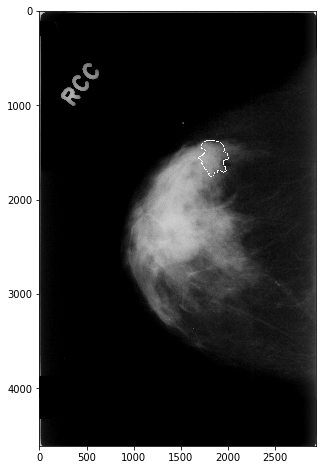

In [115]:
img = plt.imread(r'E:\DataSet\CBIS-DDSM\vaL\Mass-Test_P_00037_RIGHT_CC_full.png',cv.IMREAD_GRAYSCALE)

for i in range(1610):
    cv.circle(img,tuple(contours_info[0][a][i][0]),3,(0,0,0))
plt.figure(figsize=(16,8))
plt.imshow(img)

In [12]:
# region + class
skip_count = 2
old_filename =''
MASK_PATH = r'E:\DataSet\CBIS-DDSM\Crop_val\*_mask.png'
OUTPUT_JSON = r'E:\DataSet\CBIS-DDSM\Crop_val\annotation_skip02.json'
masks = glob.glob(MASK_PATH)
regions ={}
data = {}
count = 0
for i in range(len(masks)):
    
    regions = {}
    filename = masks[i][:-10] + "full.png"
    #print(filename)
    #next_filename = masks[i+1][:-10] + "full.png"
                #name
    name = masks[i].split("\\")[-1][:4]
                    # all_points_x, y
        
    mask = cv.imread(masks[i],cv.IMREAD_GRAYSCALE)
    #print("read image : ", masks[i])
    
    size = mask.shape[0] * mask.shape[1]
    
    key = filename + str(size)
    
    contours_info = cv.findContours(mask,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
    #print(contours_info)
    
    # 가상환경
    # rcnn_1.14
    #contours_info[0][0][...,0]

    len_idx = []
    for i in range(len(contours_info[0])):
        idx = len(contours_info[0][i])
        len_idx.append(idx)

        max_idx = np.array(len_idx).argmax()    
    
    x = contours_info[0][max_idx][...,0]
    all_point_x = x[::skip_count]
    #all_point_x = x
    in_x = list(all_point_x[...,0].astype(float))
    
    
    y = contours_info[0][max_idx][...,1]
    all_point_y = y[::skip_count]
    #all_point_y = y
    in_y = list(all_point_y[...,0].astype(float))
    #print(len(in_x),len(in_y))   
    if old_filename == filename:
        count +=1
    else:
        count = 0
    
    old_filename = filename
    
    
    if count ==0:
       
        data[key] = {"size":size,"filename":filename,"regions":regions}
    data[key]['regions'][str(count)] = {"shape_attributes":{"name":name,"all_point_x":in_x,'all_point_y':in_y}}
    #print(key, size, filename, regions)

with open(OUTPUT_JSON,'w') as json_file:
    json.dump(data,json_file)

In [7]:
import json